<a href="https://colab.research.google.com/github/apoorvamishra2107/HR-Prodigy-Infotech-/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [ ]:
import pandas as pd
import zipfile

# Specify the zip file and the specific CSV file you want to read
zip_file = '/house-prices-advanced-regression-techniques (2).zip'
csv_file = 'train.csv' # Or whichever CSV file you need

# Open the zip file
with zipfile.ZipFile(zip_file) as z:
    # Open the specific CSV file within the zip
    with z.open(csv_file) as f:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(f)

# Now you can work with the DataFrame 'df'
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
import pandas as pd
import zipfile

# Specify the zip file and the specific CSV file you want to read
zip_file = '/house-prices-advanced-regression-techniques (2).zip'
csv_file = 'train.csv' # Or whichever CSV file you need

# Open the zip file
with zipfile.ZipFile(zip_file) as z:
    # Open the specific CSV file within the zip
    with z.open(csv_file) as f:
        # Read the CSV file into a pandas DataFrame
        # Assigning the DataFrame to df_train instead of df
        df_train = pd.read_csv(f)

# Now you can work with the DataFrame 'df_train'
print(df_train.head())

#Assuming you have another CSV for testing data in the same zip file
csv_file_test = 'test.csv' # Assuming 'test.csv' is your test data file

with zipfile.ZipFile(zip_file) as z:
    with z.open(csv_file_test) as f:
        # Read the test CSV file into a pandas DataFrame
        # Assigning the test DataFrame to df_test
        df_test = pd.read_csv(f)

# Now you can access the shape of both DataFrames
df_train.shape
df_test.shape

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

(1459, 80)

In [ ]:
print(df_test.shape)

(1459, 80)


In [ ]:
print (df_train.shape)

(1460, 81)


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

Data Integration

In [ ]:
df = pd.concat([df_train, df_test])
print(df.shape)

(2919, 81)


In [ ]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ       706.0          Unf         0.0      150.0        856.0    GasA        Ex          Y      SBrkr       856       854             0       1710           1.0           0.0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn         2.0       548.0         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal   208500.0
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ       978.0          Unf         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr      1262         0             0       1262           0.0           1.0         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn         2.0       460.0         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal   181500.0
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ       486.0          Unf         0.0      434.0        920.0    GasA        Ex          Y      SBrkr       920       866             0       1786           1.0           0.0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn         2.0       608.0         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal   223500.0
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ       216.0          Unf         0.0      540.0        756.0   

In [ ]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      MeadowV       Norm       Norm    Twnhs     2Story            4            7       1970          1970     Gable  CompShg     CemntBd     CmentBd        NaN         0.0        TA        TA     CBlock       TA       TA           No          Unf         0.0          Unf         0.0      546.0        546.0    GasA        Gd          Y      SBrkr       546       546             0       1092           0.0           0.0         1         1             3             1          TA             5        Typ           0         NaN        NaN          NaN          NaN         0.0         0.0        NaN        NaN          Y           0            0              0          0            0         0    NaN    NaN         NaN        0       6    2006       WD        Normal        NaN
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      MeadowV       Norm       Norm   TwnhsE     2Story            4            5       1970          1970     Gable  CompShg     CemntBd     CmentBd        NaN         0.0        TA        TA     CBlock       TA       TA           No          Rec       252.0          Unf         0.0      294.0        546.0    GasA        TA          Y      SBrkr       546       546             0       1092           0.0           0.0         1         1             3             1          TA             6        Typ           0         NaN    CarPort       1970.0          Unf         1.0       286.0         TA         TA          Y           0           24              0          0            0         0    NaN    NaN         NaN        0       4    2006       WD       Abnorml        NaN
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1Story            5            7       1960          1996     Gable  CompShg     VinylSd     VinylSd        NaN         0.0        TA        TA     CBlock       TA       TA           No          ALQ      1224.0          Unf         0.0        0.0       1224.0    GasA        Ex          Y      SBrkr      1224         0             0       1224           1.0           0.0         1         0             4             1          TA             7        Typ           1          TA     Detchd       1960.0          Unf         2.0       576.0         TA         TA          Y         474            0              0          0            0         0    NaN    NaN         NaN        0       9    2006       WD       Abnorml        NaN
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     SFoyer            5            5       1992          1992     Gable  CompShg     HdBoard     Wd Shng        NaN         0.0        TA        TA      PConc       Gd       TA           Av          GLQ       337.0          Unf         0.0   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
#Most null value
Alley
Fireplace
PoolQC
Fence
Misc Feature


In [ ]:
int_features = df.select_dtypes(include=["int64"]).columns # Assign the result to int_features
print("Total number of integer features : ",int_features.shape[0])
int_features.tolist()



Total number of integer features :  26


['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
float_features = df.select_dtypes(include=["float64"]).columns # Assign the result to float_features
print("Total number of float features : ",float_features.shape[0])
float_features.tolist()

Total number of float features :  12


['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [ ]:
cat_features = df.select_dtypes(include=["object"]).columns # Assign the result to object_features
print("Total number of categorical features : ",cat_features.shape[0])
cat_features.tolist()

Total number of categorical features :  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000  2919.000000   2919.000000  2919.000000  2919.000000    1460.000000
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072     5.564577  1971.312778   1984.264474   102.201312   441.423235    49.582248   560.772104  1051.777587  1159.581706   336.483727      4.694416  1500.759849      0.429894      0.061364     1.568003     0.380267      2.860226      1.044536      6.451524     0.597122  1978.113406     1.766621   472.874572    93.709832    47.486811      23.098321     2.602261    16.062350     2.251799     50.825968     6.213087  2007.792737  180921.195890
std     842.787043    42.517628    23.344905    7886.996359     1.409947     1.113131    30.291442     20.894344   179.334253   455.610826   169.205611   439.543659   440.766258   392.362079   428.701456     46.396825   506.051045      0.524736      0.245687     0.552969     0.502872      0.822693      0.214462      1.569379     0.646129    25.574285     0.761624   215.394815   126.526589    67.575493      64.244246    25.188169    56.184365    35.663946    567.402211     2.714762     1.314964   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1895.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     730.500000    20.000000    59.000000    7478.000000     5.000000     5.000000  1953.500000   1965.000000     0.000000     0.000000     0.000000   220.000000   793.000000   876.000000     0.000000      0.000000  1126.000000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1960.000000     1.000000   320.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     4.000000  2007.000000  129975.000000
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000     5.000000  1973.000000   1993.000000     0.000000   368.500000     0.000000   467.000000   989.500000  1082.000000     0.000000      0.000000  1444.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1979.000000     2.000000   480.000000     0.000000    26.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000     6.000000  2001.000000   2004.000000   164.000000   733.000000     0.000000   805.500000  1302.000000  1387.500000   704.000000      0.000000  1743.500000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    70.000000       0.00000

In [ ]:
import pandas as pd
import zipfile

# Specify the path to your zip file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'

# Specify the name of the CSV file within the zip file that you want to read
csv_file_name = 'train.csv'  # Replace with the actual file name

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to a temporary file-like object
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file, encoding='latin-1') # You might need to adjust encoding


df.describe().shape

(8, 38)

In [ ]:
df["MSSubClass"]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

Handling Missing Values

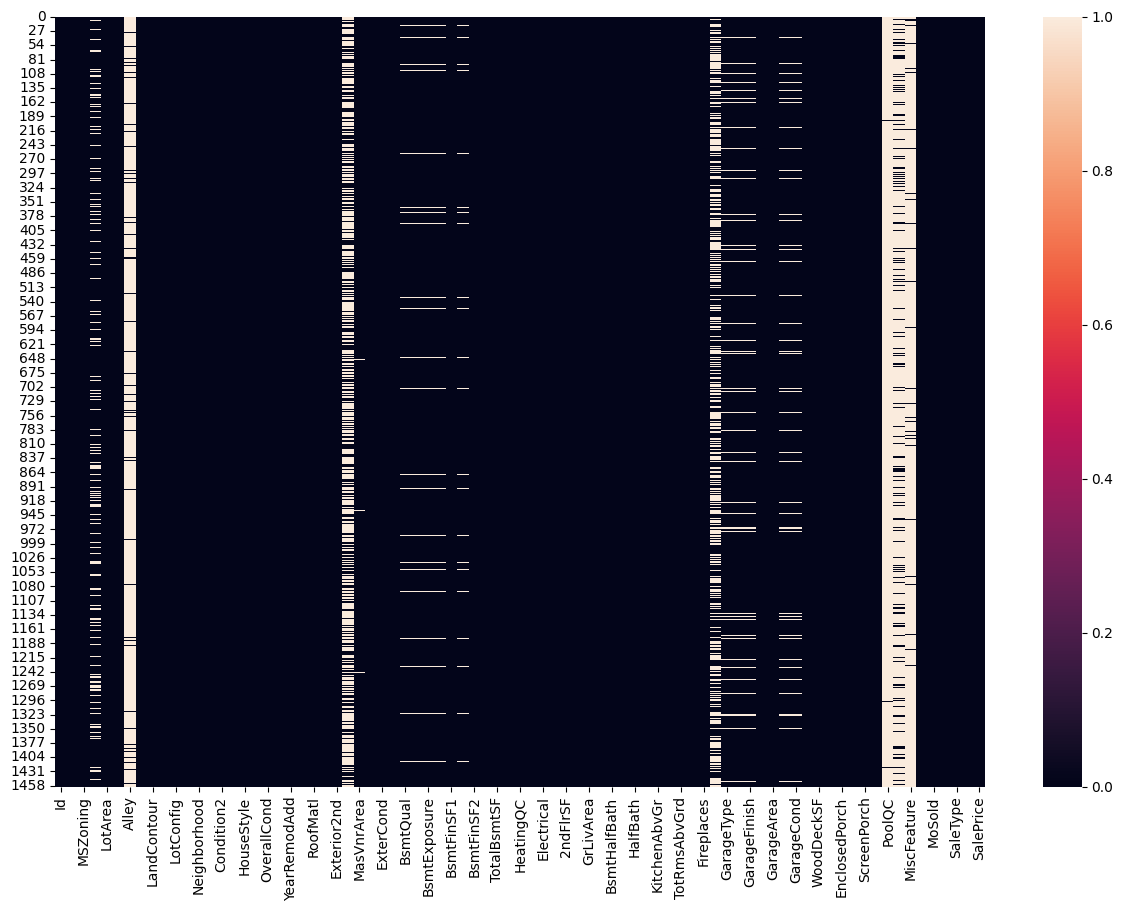

In [ ]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import os # Import the os module

# Specify the path to your zip file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'

# Specify the name of the CSV file within the zip file that you want to read
csv_file_name = 'train.csv'  # Replace with the actual file name

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to a temporary file-like object
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(csv_file, encoding='latin-1') # You might need to adjust encoding


plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

# Create the 'EDA_img' directory if it doesn't exist
if not os.path.exists("EDA_img"):
    os.makedirs("EDA_img")

plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: MSSubClass, Length: 1460, dtype: int64

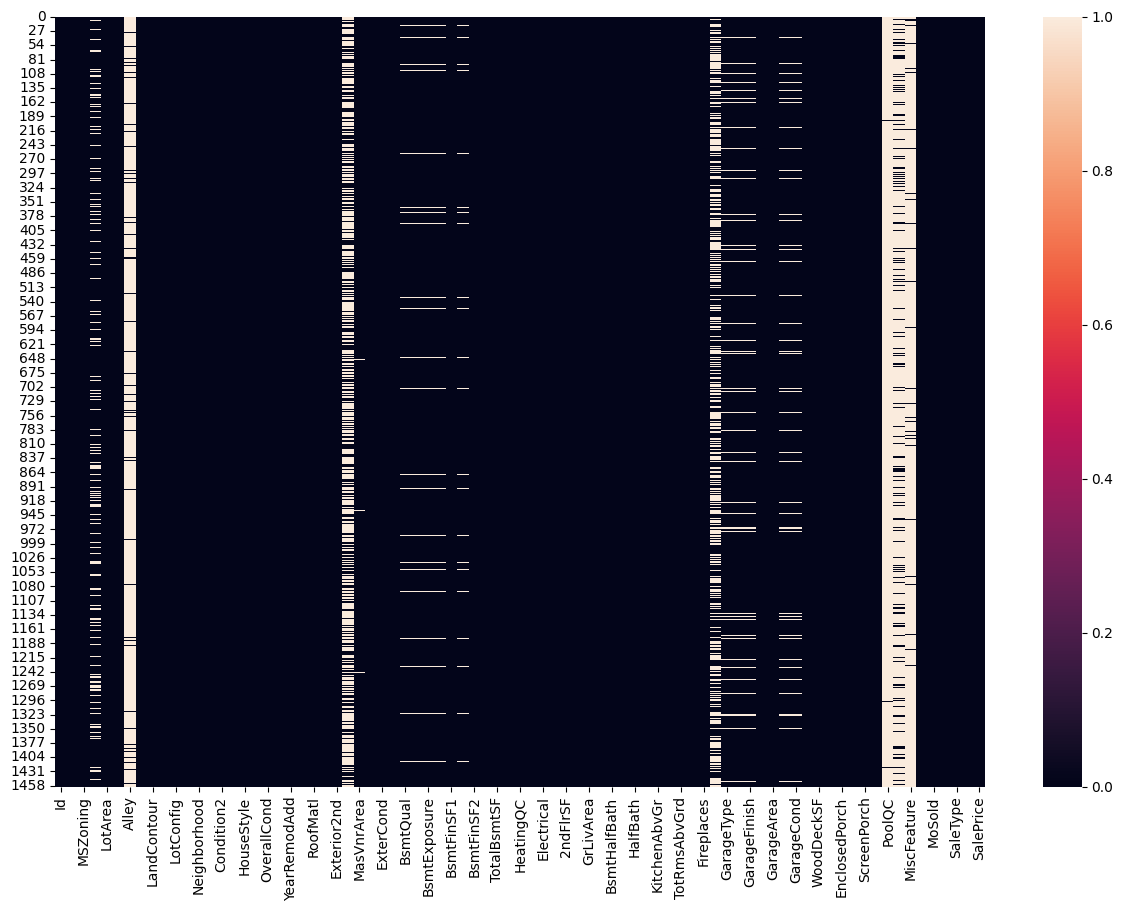

In [ ]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import os  # Import the os module

# Specify the path to your zip file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'

# Specify the name of the CSV file within the zip file that you want to read
csv_file_name = 'train.csv'  # Replace with the actual file name

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to a temporary file-like object
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(
            csv_file, encoding='latin-1'
        )  # You might need to adjust encoding

plt.figure(figsize=(15, 10))
sns.heatmap(df.isnull())

# Create the 'EDA_img' directory if it doesn't exist
if not os.path.exists("EDA_img"):
    os.makedirs("EDA_img")

plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

# Setting the index
df.set_index('Id', inplace=True)  # Modifies df in place
# OR
# df = df.set_index('Id') # Creates a new DataFrame with 'Id' as the index

# Now you can continue working with df, which has 'Id' as its index
df["MSSubClass"]

In [ ]:
df = df.set_index('Id', inplace=True)

In [ ]:
null_count = df.isnull().sum()
null_count

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [ ]:
null_percent = df.isnull().sum() / df.shape[0] * 100
null_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [ ]:
miss_value_50_percent = null_percent[null_percent > 50]
miss_value_50_percent

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [ ]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [ ]:
import pandas as pd
import zipfile

# Replace 'your_zip_file.zip' with the actual path to your zip file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'

# Replace 'your_csv_file.csv' with the actual name of the CSV file within the zip
csv_file_name = 'train.csv'  # Assuming you want to read the 'train.csv' file

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Read the CSV file from the zip file into a DataFrame
    df = pd.read_csv(zip_ref.open(csv_file_name))

# Now you can proceed with your analysis using the 'df' DataFrame
# Calculate the percentage of null values for each column
null_percent = df.isnull().sum() / df.shape[0] * 100

# Filter columns with more than 50% missing values
miss_value_50_percent = null_percent[null_percent > 50]

# Display columns with more than 50% missing values
print("Columns with more than 50% missing values:\n", miss_value_50_percent)

# Filter columns with missing values between 20% and 50%
miss_value_20_50_percent = null_percent[(null_percent > 20) & (null_percent < 50)]

# Display columns with missing values between 20% and 50%
print("\nColumns with missing values between 20% and 50%:\n", miss_value_20_50_percent)

Columns with more than 50% missing values:
 Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

Columns with missing values between 20% and 50%:
 FireplaceQu    47.260274
dtype: float64


In [ ]:
miss_value_5_20_percent = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_percent

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [ ]:
miss_value_20_50_percent = null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_percent

FireplaceQu    47.260274
dtype: float64

In [ ]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: count, dtype: int64

<Axes: >

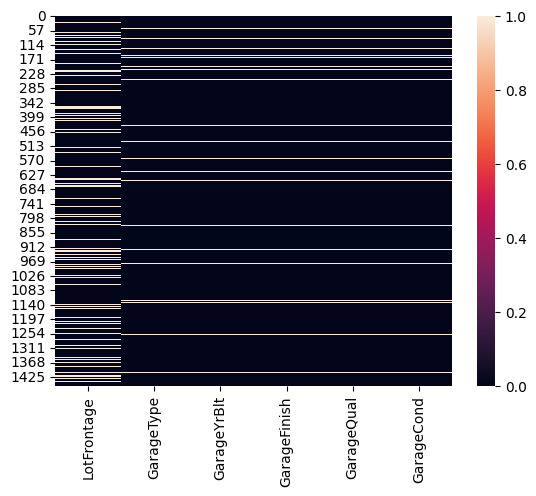

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[miss_value_5_20_percent.keys()].isnull())

Missing Value Imputation

In [ ]:
missing_value_features = null_percent[null_percent > 0].keys()
print("Total missing value features = ", len(missing_value_features))

Total missing value features =  19


In [ ]:
missing_value_features

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
cat_na_feat = missing_value_features[missing_value_features.isin(cat_features)]
print("Total number of categorical missing features = " ,len(cat_na_feat))

Total number of categorical missing features =  16


In [ ]:
# Define the int_features variable before using it
# Ensure the below variable includes all the integer features present in your dataset
int_features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                'MiscVal', 'MoSold', 'YrSold']

int_na_feat = missing_value_features[missing_value_features.isin(int_features)]
print("Total number of integer missing features = " ,len(int_na_feat))

Total number of integer missing features =  0


In [ ]:
# Define the float_features variable before using it
# Ensure the below variable includes all the float features present in your dataset
float_features = ['MasVnrArea', 'GarageYrBlt'] # Add any other relevant float features here

float_na_feat = missing_value_features[missing_value_features.isin(float_features)]
print("Total number of float missing features = " ,len(float_na_feat))

Total number of float missing features =  2


In [ ]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

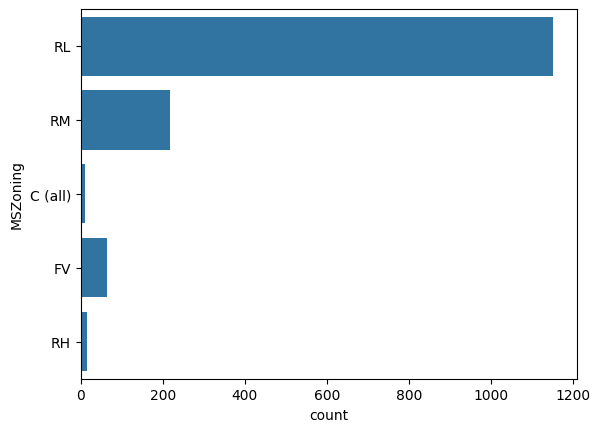

In [ ]:
sns.countplot(df["MSZoning"])

In [ ]:
df_mvi = df.copy()
df_mvi.shape

(1460, 81)

In [ ]:
import numpy as np
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()

<ipython-input-43-5d697097d739>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace=True)


0

In [ ]:
def oldNewCountPlot(df, df_new, features):
  plt.subplot(121)
  sns.countplot(df_mvi[feature])
  plt.title("Old Data Distribution")
  plt.subplot(122)
  sns.countplot(df_mvi[feature])
  plt.title("New Data Distribution")
  plt.show()

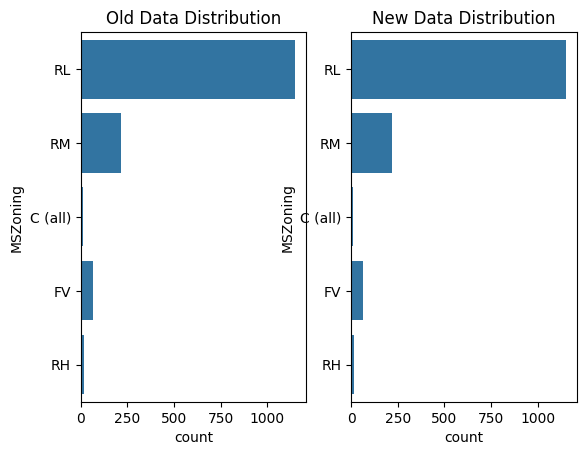

In [ ]:
oldNewCountPlot(df, df_mvi, "MSZoning")

In [ ]:
df_mvi["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [ ]:
alley_count = "NA"
df_mvi["Alley"].replace(np.nan, "NA", inplace=True)
df_mvi["Alley"].isnull().sum()

<ipython-input-52-e1bd9837f88c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan, "NA", inplace=True)


0

In [ ]:
def oldNewCountPlot(df, df_new, features):
  plt.subplot(121)
  # Changed 'feature' to 'features' to use the function parameter
  sns.countplot(df_mvi[features])
  plt.title("Old Data Distribution")
  plt.subplot(122)
  # Changed 'feature' to 'features' to use the function parameter
  sns.countplot(df_mvi[features])
  plt.title("New Data Distribution")
  plt.show()

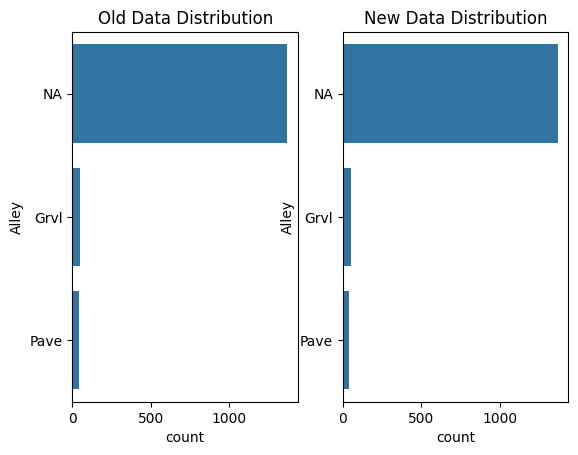

In [ ]:
oldNewCountPlot(df, df_mvi, "Alley")

In [ ]:
def boxHistPlot(df, figsize=(16,5)):
  plt.figure(figsize=figsize)
  plt.subplot(121)
  sns.boxplot(df)
  plt.subplot(122)
  sns.distplot(df)

<ipython-input-5-3482fc5f2a50>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)
<ipython-input-5-3482fc5f2a50>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


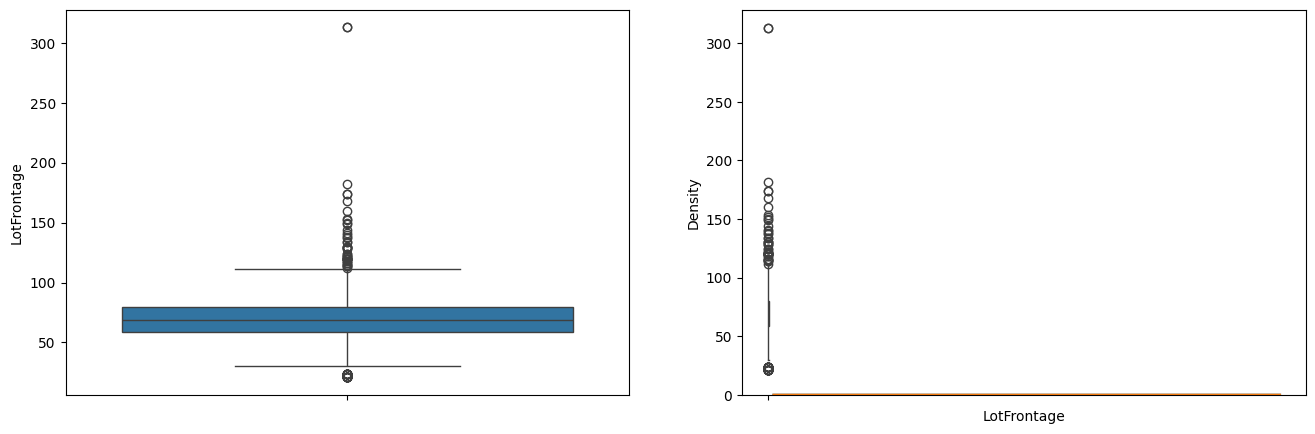

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile  # Import the zipfile module

# Assuming df_mvi is the DataFrame you want to use, replace 'df_mvi' with the actual name if different
# If df_mvi doesn't exist, you need to create it or load it from a file.
# For example, to load from a CSV file:
# Assuming your file is a zip file containing a CSV, first extract the CSV:
with zipfile.ZipFile("/content/house-prices-advanced-regression-techniques (2) (1).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")  # Extract to the current directory

# Now read the extracted CSV file:
df_mvi = pd.read_csv("/content/train.csv")  # Replace "train.csv" with the actual name of the extracted CSV file

df = df_mvi  # Assign df_mvi to df

boxHistPlot(df["LotFrontage"])

In [ ]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

<ipython-input-28-4b4dea1e090e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)


0

In [ ]:
def oldNewBoxHistPlot(df, df_new, feature, figsize=(21,12)):
  plt.figure(figsize=figsize)
  plt.subplot(221)
  sns.boxplot(df[feature]) # Changed 'features' to 'feature'
  plt.title("Old Data Distribution")

  plt.subplot(222)
  sns.distplot(df[feature]) # Changed 'features' to 'feature'
  plt.title("Old Data Distribution")

  plt.subplot(223)
  sns.boxplot(df_new[feature]) # Changed 'features' to 'feature'
  plt.title("New Data Distribution")

  plt.subplot(224)
  sns.distplot(df_new[feature]) # Changed 'features' to 'feature'
  plt.title("New Data Distribution")
  plt.show()

<ipython-input-38-4c4ae39fa72a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature]) # Changed 'features' to 'feature'
<ipython-input-38-4c4ae39fa72a>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature]) # Changed 'features' to 'feature'


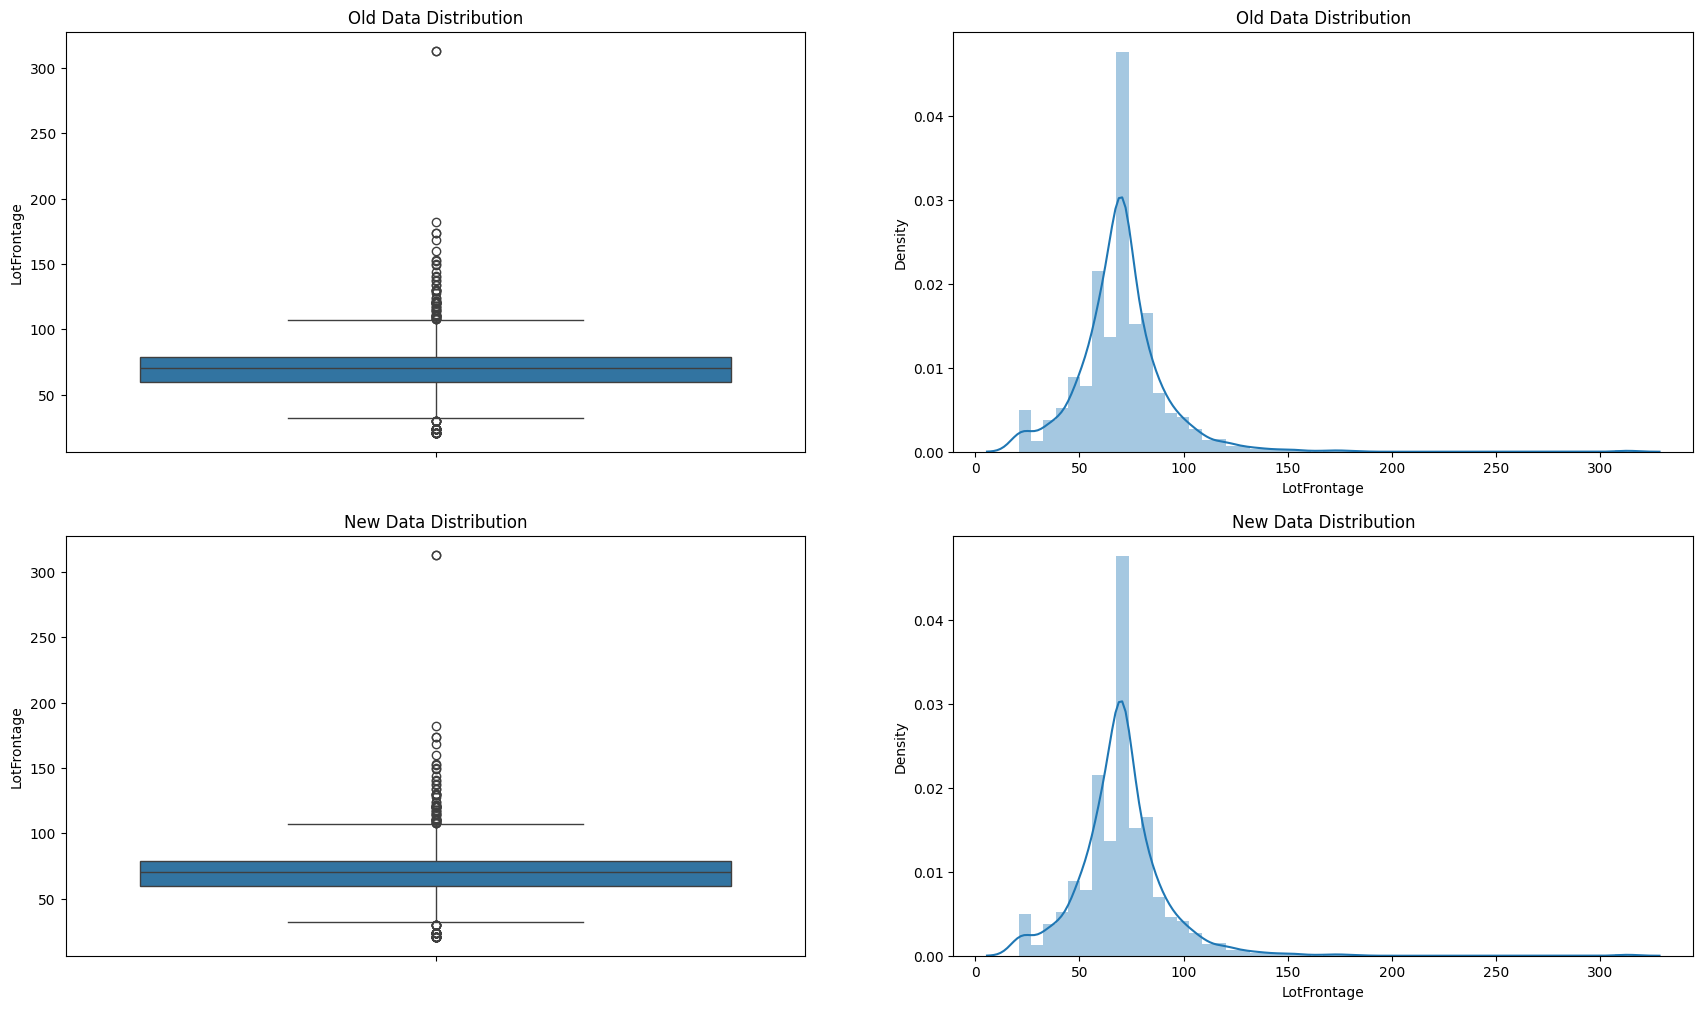

In [ ]:
oldNewBoxHistPlot(df, df_mvi, "LotFrontage")

In [ ]:
df["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [ ]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

<ipython-input-41-c70f44e09bec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, utilities_mode, inplace=True)


0

In [ ]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [ ]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [ ]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode, inplace=True)
print("E1st is null: ", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ", df_mvi["Exterior2nd"].isnull().sum())

E1st is null:  0
E2nd is null:  0


<ipython-input-44-05156e051afe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode, inplace=True)
<ipython-input-44-05156e051afe>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

<Axes: >

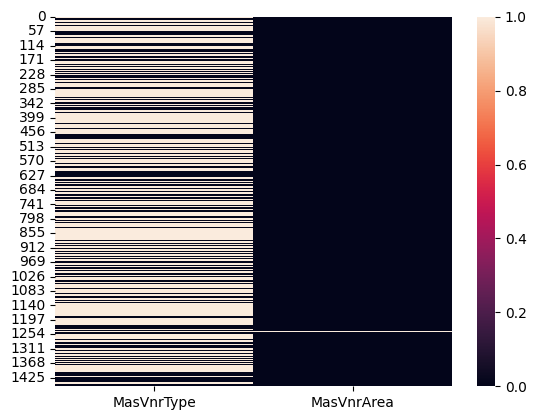

In [ ]:
sns.heatmap(df[["MasVnrType", "MasVnrArea"]].isnull())

In [ ]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5            Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
8            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1         5   2007        WD         Normal     181500  
3         2   2006        WD        Abnorml     140000  
5        10   2009        WD         Normal     143000  
8         4   2008        WD        Abnorml     129900  
9         1   2008        WD         Normal     118000  
...     ...    ...       ...            ...        ...  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[872 rows x 81 columns]

In [ ]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [ ]:
import pandas as pd
import zipfile
import numpy as np # Import the NumPy library

# Replace 'your_zip_file.zip' with the actual path to your zip file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'
csv_file_name = 'train.csv'  # Replace with the actual CSV file name within the zip

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the CSV file to a temporary file
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV data into a pandas DataFrame
        df = pd.read_csv(csv_file)

# Now you can work with your DataFrame 'df'
masvnrtype_mode = df["MasVnrType"].mode()[0]

# Create a copy of df and assign it to df_mvi
df_mvi = df.copy() # Creating a copy of df to avoid modifying the original DataFrame

# Replace NaN values in 'MasVnrType' column of df_mvi
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)
df_mvi["MasVnrType"].isnull().sum()

<ipython-input-6-4dfef602211c>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode, inplace=True)


0

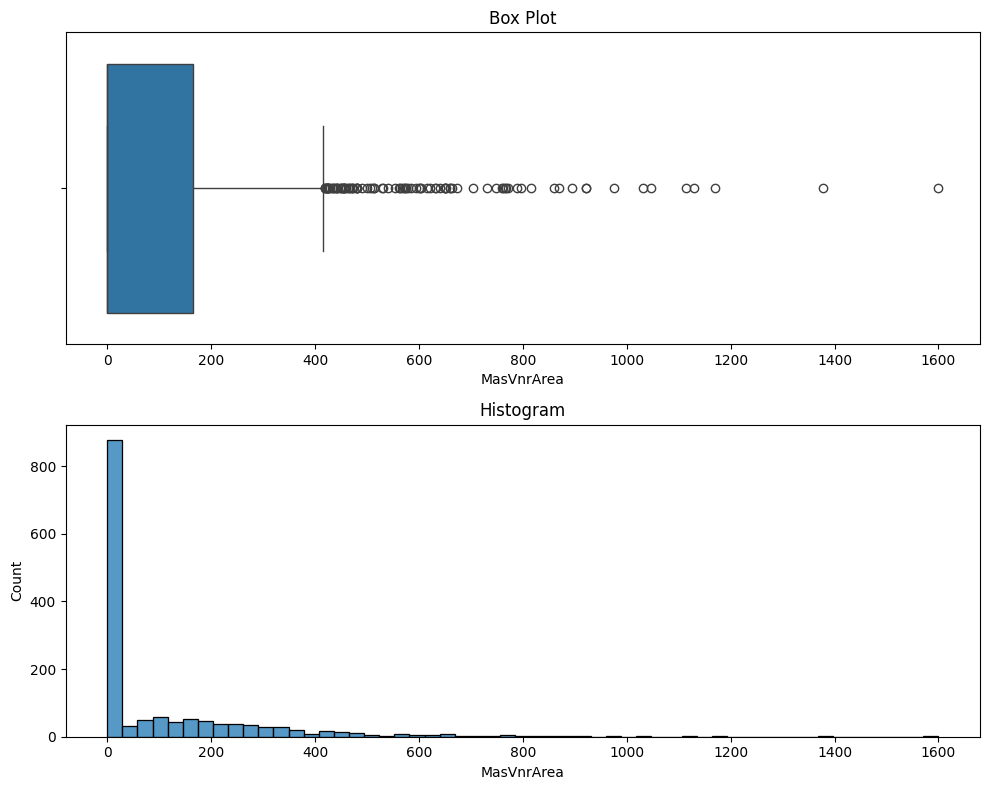

In [ ]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (your existing code to load and process data) ...

def boxHistPlot(data_series):
    """
    Generates a box plot and a histogram for a given pandas Series.

    Args:
    data_series (pd.Series): The data series to plot.
    """
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Box plot
    sns.boxplot(x=data_series, ax=axs[0])
    axs[0].set_title('Box Plot')

    # Histogram
    sns.histplot(data_series, ax=axs[1])
    axs[1].set_title('Histogram')

    plt.tight_layout()
    plt.show()

# Now you can call the function:
boxHistPlot(df_mvi["MasVnrArea"])

In [ ]:
masvnrarea_cont = 0
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

<ipython-input-11-3e72b7ca9ee2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont, inplace=True)


0

In [ ]:
from ast import Num
cat_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

In [ ]:
cat_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
num_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]

<Axes: >

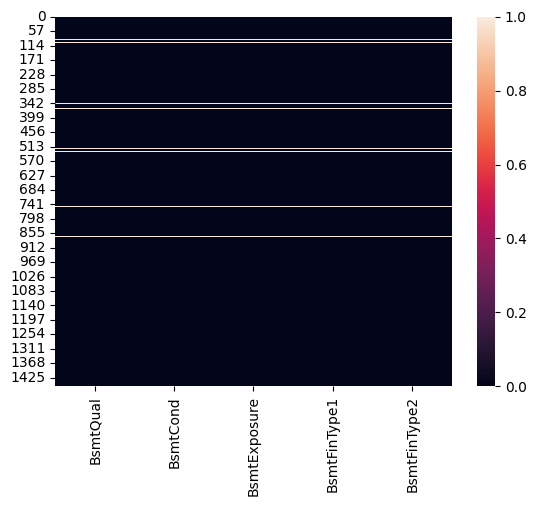

In [ ]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [ ]:
for feature in cat_bsmt_feat:
  print(df[feature].value_counts())

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


In [ ]:
bsmt_cont = "NA"
for feature in cat_bsmt_feat:
  df_mvi[feature].replace(np.nan, bsmt_cont, inplace=True)


<ipython-input-16-20afe094d7aa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, bsmt_cont, inplace=True)


In [ ]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: >

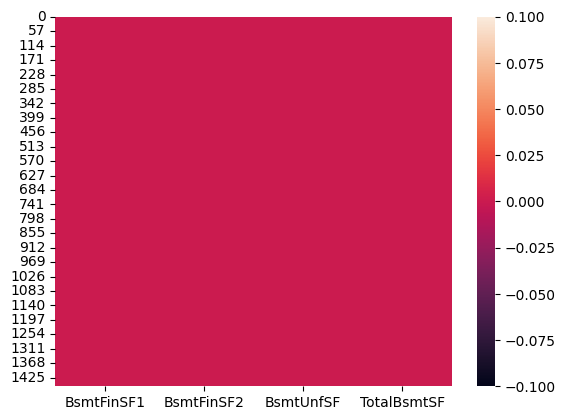

In [ ]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [ ]:
df_bsmt = df[cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
17        NaN      NaN          NaN          NaN          NaN           0   
39        NaN      NaN          NaN          NaN          NaN           0   
90        NaN      NaN          NaN          NaN          NaN           0   
102       NaN      NaN          NaN          NaN          NaN           0   
156       NaN      NaN          NaN          NaN          NaN           0   
182       NaN      NaN          NaN          NaN          NaN           0   
259       NaN      NaN          NaN          NaN          NaN           0   
332        Gd       TA           No          GLQ          NaN        1124   
342       NaN      NaN          NaN          NaN          NaN           0   
362       NaN      NaN          NaN          NaN          NaN           0   
371       NaN      NaN          NaN          NaN          NaN           0   
392       NaN      NaN          NaN          NaN          NaN           0   
520       NaN      NaN          NaN          NaN          NaN           0   
532       NaN      NaN          NaN          NaN          NaN           0   
533       NaN      NaN          NaN          NaN          NaN           0   
553       NaN      NaN          NaN          NaN          NaN           0   
646       NaN      NaN          NaN          NaN          NaN           0   
705       NaN      NaN          NaN          NaN          NaN           0   
736       NaN      NaN          NaN          NaN          NaN           0   
749       NaN      NaN          NaN          NaN          NaN           0   
778       NaN      NaN          NaN          NaN          NaN           0   
868       NaN      NaN          NaN          NaN          NaN           0   
894       NaN      NaN          NaN          NaN          NaN           0   
897       NaN      NaN          NaN          NaN          NaN           0   
948        Gd       TA          NaN          Unf          Unf           0   
984       NaN      NaN          NaN          NaN          NaN           0   
1000      NaN      NaN          NaN          NaN          NaN           0   
1011      NaN      NaN          NaN          NaN          NaN           0   
1035      NaN      NaN          NaN          NaN          NaN           0   
1045      NaN      NaN          NaN          NaN          NaN           0   
1048      NaN      NaN          NaN          NaN          NaN           0   
1049      NaN      NaN          NaN          NaN          NaN           0   
1090      NaN      NaN          NaN          NaN          NaN           0   
1179      NaN      NaN          NaN          NaN          NaN           0   
1216      NaN      NaN          NaN          NaN          NaN           0   
1218      NaN      NaN          NaN          NaN          NaN           0   
1232      NaN      NaN          NaN          NaN          NaN           0   
1321      NaN      NaN          NaN          NaN          NaN           0   
1412      NaN      NaN          NaN          NaN          NaN           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  
17             0          0            0  
39             0          0            0  
90             0          0            0  
102            0          0            0  
156            0          0            0  
182            0          0            0  
259            0          0            0  
332          479       1603         3206  
342            0          0            0  
362            0          0            0  
371            0          0            0  
392            0          0            0  
520            0          0            0  
532            0          0            0  
533            0          0            0  
553            0          0            0  
646            0          0            0  
705            0          0            0  
736            0          0            0  
749            0          0            0  
778            0     

In [ ]:
bsmt_cont = 0
for feature in num_bsmt_feat:
  df_mvi[feature].replace(np.nan, bsmt_cont, inplace=True)

<ipython-input-20-11b29140b7c9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, bsmt_cont, inplace=True)


In [ ]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1     0
BsmtFinSF2     0
BsmtUnfSF      0
TotalBsmtSF    0
dtype: int64

In [ ]:
df_mvi["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [ ]:
df["KitchenQual"].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [ ]:
df_ekk = df[["Electrical", "KitchenQual", "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

Electrical KitchenQual  KitchenAbvGr
1379        NaN          Gd             1

In [ ]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, masvnrarea_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

<ipython-input-26-381e12f44a4b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, masvnrarea_mode, inplace=True)


0

In [ ]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

<ipython-input-27-745704f7b897>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)


0

In [ ]:
df["Functional"].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [ ]:
df["SaleType"].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [ ]:
Functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

<ipython-input-30-76ecc89bccf5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan, KitchenQual_mode, inplace=True)


0

In [ ]:
SaleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

<ipython-input-31-d3549e4abf3b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, KitchenQual_mode, inplace=True)


0

In [ ]:
other_cat_feat = ["FireplaceQu",
                  "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for feature in other_cat_feat:
  print(df[feature].value_counts())

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


In [ ]:
FireplaceQu_cont = "NA"
df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_cont, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

<ipython-input-33-c17af4ddabb8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_cont, inplace=True)


0

In [ ]:
PoolQC_cont = "NA"
df_mvi["PoolQC"].replace(np.nan, PoolQC_cont, inplace=True)
df_mvi["PoolQC"].isnull().sum()

<ipython-input-34-2ee5f4f9c2b4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["PoolQC"].replace(np.nan, PoolQC_cont, inplace=True)


0

In [ ]:
Fence_cont = "NA"
df_mvi["Fence"].replace(np.nan, Fence_cont, inplace=True)
df_mvi["Fence"].isnull().sum()

<ipython-input-35-475be77f563b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, Fence_cont, inplace=True)


0

In [ ]:
MiscFeature_cont = "NA"
df_mvi["MiscFeature"].replace(np.nan, MiscFeature_cont, inplace=True)
df_mvi["MiscFeature"].isnull().sum()

<ipython-input-36-93a3ca40bf25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MiscFeature"].replace(np.nan, MiscFeature_cont, inplace=True)


0

In [ ]:
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]
cat_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

df_garage = df[num_garage_feat + cat_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

GarageYrBlt  GarageCars  GarageArea GarageType GarageFinish GarageQual  \
39            NaN           0           0        NaN          NaN        NaN   
48            NaN           0           0        NaN          NaN        NaN   
78            NaN           0           0        NaN          NaN        NaN   
88            NaN           0           0        NaN          NaN        NaN   
89            NaN           0           0        NaN          NaN        NaN   
...           ...         ...         ...        ...          ...        ...   
1349          NaN           0           0        NaN          NaN        NaN   
1407          NaN           0           0        NaN          NaN        NaN   
1449          NaN           0           0        NaN          NaN        NaN   
1450          NaN           0           0        NaN          NaN        NaN   
1453          NaN           0           0        NaN          NaN        NaN   

     GarageCond  
39          NaN  
48          NaN  
78          NaN  
88          NaN  
89          NaN  
...         ...  
1349        NaN  
1407        NaN  
1449        NaN  
1450        NaN  
1453        NaN  

[81 rows x 7 columns]

In [ ]:
garage_cont = "NA"
for feature in cat_garage_feat:
  df_mvi[feature].replace(np.nan, garage_cont, inplace=True)

df_mvi[cat_garage_feat].isnull().sum()

<ipython-input-38-5a4d5079b49a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, garage_cont, inplace=True)


GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [ ]:
garage_num = "NA"
for feature in num_garage_feat:
  df_mvi[feature].replace(np.nan, garage_num, inplace=True)

df_mvi[num_garage_feat].isnull().sum()

<ipython-input-39-1708c5a0a440>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feature].replace(np.nan, garage_num, inplace=True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [ ]:
df_mvi.isnull().any(axis=1).sum()

1374

FEATURE TRANSFORMATION

In [ ]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feature in for_num_conv:
  print(f"{feature} : {df[feature].dtype}")

MSSubClass : int64
YearBuilt : int64
YearRemodAdd : int64
GarageYrBlt : float64
MoSold : int64
YrSold : int64


In [ ]:
df_mvi[for_num_conv].head()

MSSubClass YearBuilt YearRemodAdd GarageYrBlt MoSold YrSold
0         60      2003         2003      2003.0      2   2008
1         20      1976         1976      1976.0      5   2007
2         60      2001         2002      2001.0      9   2008
3         70      1915         1970      1998.0      2   2006
4         60      2000         2000      2000.0     12   2008

In [ ]:
df_mvi['MoSold'].value_counts() # Use the column name as a string to subset the column

MoSold
6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: count, dtype: int64

In [ ]:
df_mvi['MoSold'].unique()

array(['2', '5', '9', '12', '10', '8', '11', '4', '1', '7', '3', '6'],
      dtype=object)

In [ ]:
import calendar # Import the calendar module

calendar.month_abbr[12] # Now you can use calendar.month_abbr

'Dec'

In [ ]:
import calendar # Import the calendar module

# Define a function to convert month number to abbreviation
def get_month_abbr(month_num):
    try:
        # Attempt to convert month number to abbreviation
        # If month_num is out of range (1-12) it handles the error
        return calendar.month_abbr[int(month_num)]
    except (ValueError, IndexError):
        # If month_num is not a valid integer or out of range, return original value
        return month_num

# Apply the function to the 'MoSold' column
df_mvi['MoSold'] = df_mvi['MoSold'].apply(get_month_abbr)

df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [ ]:
for feat in for_num_conv:
  df_mvi[feat] = df_mvi[feat].astype(str)

In [ ]:
for feat in for_num_conv:
  print(f"{feat} : {df_mvi[feat].dtype}")

MSSubClass : object
YearBuilt : object
YearRemodAdd : object
GarageYrBlt : object
MoSold : object
YrSold : object


In [ ]:
ordinal_end_var = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
print("Total number of features to convert ordinal numerical format:", len(ordinal_end_var))

Total number of features to convert ordinal numerical format: 10


In [ ]:
import pandas as pd # Import pandas

df_mvi["ExterQual"] = pd.Categorical(df_mvi["ExterQual"],
                                      categories=["Po", "Fa", "TA", "Gd", "Ex"],
                                      ordered=True)

df_mvi["ExterQual_codes"] = df_mvi["ExterQual"].cat.codes # store codes in new column

# Display the updated column
print(df_mvi[["ExterQual", "ExterQual_codes"]].head())

  ExterQual  ExterQual_codes
0        Gd                3
1        TA                2
2        Gd                3
3        TA                2
4        Gd                3


In [ ]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Po      0
Name: count, dtype: int64

In [ ]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: count, dtype: int64

In [ ]:
df_mvi["BsmtExposure"] = pd.Categorical(df_mvi["BsmtExposure"],
                                      categories=["NA", "No", "Mn", "Av", "Gd"],
                                      ordered=True)

In [ ]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: count, dtype: int64

In [ ]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Id               1460 non-null   int64   
 1   MSSubClass       1460 non-null   object  
 2   MSZoning         1460 non-null   object  
 3   LotFrontage      1201 non-null   float64 
 4   LotArea          1460 non-null   int64   
 5   Street           1460 non-null   object  
 6   Alley            91 non-null     object  
 7   LotShape         1460 non-null   object  
 8   LandContour      1460 non-null   object  
 9   Utilities        1460 non-null   object  
 10  LotConfig        1460 non-null   object  
 11  LandSlope        1460 non-null   object  
 12  Neighborhood     1460 non-null   object  
 13  Condition1       1460 non-null   object  
 14  Condition2       1460 non-null   object  
 15  BldgType         1460 non-null   object  
 16  HouseStyle       1460 non-null   object  


In [ ]:
df_encod = df_mvi.copy()
object_features = df_encod.select_dtypes(include=["object"]).columns.tolist()
print("Total number of object data type features = ", len(object_features))

print(object_features)

Total number of object data type features =  47
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [ ]:
df_encod[object_features].head(2)

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   

  LandSlope Neighborhood  ... GarageQual GarageCond PavedDrive PoolQC Fence  \
0       Gtl      CollgCr  ...         TA         TA          Y     NA    NA   
1       Gtl      Veenker  ...         TA         TA          Y     NA    NA   

  MiscFeature MoSold YrSold SaleType SaleCondition  
0          NA    Feb   2008       WD        Normal  
1          NA    May   2007       WD        Normal  

[2 rows x 47 columns]

In [ ]:
df_encod = pd.get_dummies(df_encod, columns=object_features,prefix=object_features, drop_first=True)

In [ ]:

df_encod["MSZoning_RL"].value_counts()  # Example: Assuming 'RL' was a value in 'MSZoning'

MSZoning_RL
True     1151
False     309
Name: count, dtype: int64

In [ ]:

MSZoning_dummies = pd.get_dummies(df_mvi["MSZoning"], prefix="MSZoning", drop_first=True)



In [ ]:
print("Shape of DF before encoding : ", df_encod.shape)


Shape of DF before encoding :  (1460, 546)


In [ ]:
# Assuming df_mvi is your original DataFrame before any encoding

# Get the list of object (categorical) features
object_features = df_mvi.select_dtypes(include=['object']).columns.tolist()

# Create dummy variables for the object features
df_encod = pd.get_dummies(df_mvi, columns=object_features, prefix=object_features, drop_first=True)

print("Shape of DF after encoding : ", df_encod.shape)

Shape of DF after encoding :  (1460, 546)


In [ ]:
df_encod.head(2)

Id  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea ExterQual  \
0   1         65.0     8450            7            5       196.0        Gd   
1   2         80.0     9600            6            8         0.0        TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  SaleType_ConLw  \
0           No         706           0  ...           False           False   
1           Gd         978           0  ...           False           False   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0         False         False         True                  False   
1         False         False         True                  False   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                 False                 False                  True   
1                 False                 False                  True   

   SaleCondition_Partial  
0                  False  
1                  False  

[2 rows x 546 columns]

In [ ]:
df_encod.select_dtypes(include=['object']).columns.tolist()

[]

Splitting the Data for Training and Testing Purpose

In [ ]:
df_encod.shape

(1460, 546)

In [ ]:
import pandas as pd
import zipfile

# Specify the path to your ZIP file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'

# Specify the name of the CSV file within the ZIP archive that you want to read
csv_file_name = 'train.csv'  # Replace with the actual CSV file name

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the desired CSV file
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df_train = pd.read_csv(csv_file)

# Now you can work with the DataFrame 'df_train'
print(df_train.shape[0])

1460


In [ ]:
# Assuming you want to use 80% of the data for training
len_train = int(df_encod.shape[0] * 0.8)  # Calculate the length of the training set

X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod[:len_train]["SalePrice"]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)

print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)

Shape of X_train =  (1168, 545)
Shape of y_train =  (1168,)
Shape of X_test =  (292, 545)


Feature Scaling

In [ ]:
import pandas as pd
import zipfile
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class from the correct module.


# Specify the path to your ZIP file
zip_file_path = '/content/house-prices-advanced-regression-techniques (2) (1).zip'

# Specify the name of the CSV file within the ZIP archive that you want to read
csv_file_name = 'train.csv'  # Replace with the actual CSV file name

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the desired CSV file
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file into a pandas DataFrame
        df_train = pd.read_csv(csv_file)

# Now you can work with the DataFrame 'df_train'
print(df_train.shape[0])
# Assuming you want to use 80% of the data for training
#Assuming df_encod is derived from df_train
df_encod = df_train.copy()

len_train = int(df_encod.shape[0] * 0.8)  # Calculate the length of the training set

X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod[:len_train]["SalePrice"]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)

print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of X_test = ", X_test.shape)

# Identify the columns with object (string) dtypes in your DataFrame
object_cols = X_train.select_dtypes(include=['object']).columns

# Convert object (string) columns to numerical using one-hot encoding
X_train = pd.get_dummies(X_train, columns=object_cols, drop_first=True) # drop_first to avoid multicollinearity
X_test = pd.get_dummies(X_test, columns=object_cols, drop_first=True)

# Align the columns in X_train and X_test (handle potential missing columns due to one-hot encoding)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

sc = StandardScaler()
sc.fit(X_train)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1460
Shape of X_train =  (1168, 80)
Shape of y_train =  (1168,)
Shape of X_test =  (292, 80)


In [ ]:
X_train[:3,:]

array([[-1.73056852,  0.07608137, -0.21081543, -0.19407633,  0.65264239,
        -0.50621145,  1.05377353,  0.87518771,  0.50941241,  0.60577172,
        -0.28743792, -0.93736417, -0.47150843, -0.80382036,  1.1899582 ,
        -0.12419566,  0.41059796,  1.1094668 , -0.25096879,  0.80469555,
         1.2413869 ,  0.18136063, -0.20614143,  0.94162279, -0.95361565,
         0.99460735,  0.32311085,  0.35988568, -0.7657957 ,  0.22738692,
        -0.3576103 , -0.12048778, -0.27316743, -0.04113355, -0.08287825,
        -1.60886331,  0.13637157, -0.21802209, -0.10188534,  0.51786751,
        -0.41697643,  0.06556848, -0.16783627, -0.17833149, -0.07185758,
         0.76613088, -0.19073481, -0.15956482,  0.33047205, -0.02927282,
        -0.25819889, -0.17833149, -0.04141577,  0.62223259, -0.21147747,
        -0.09750562, -0.04141577, -0.10188534, -0.20017802, -0.14484136,
         2.9830027 , -0.18087126, -0.26750632, -0.24077171, -0.17051361,
        -0.11405937, -0.18087126, -0.42402592, -0.0

In [ ]:
sc.mean_.shape

(234,)

In [ ]:
sc.n_features_in_

234

In [ ]:
sc.n_samples_seen_

array([1168, 1168,  962, 1168, 1168, 1168, 1168, 1168, 1162, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1103, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168, 1168,
       1168, 1168, 1168, 1168, 1168, 1168, 1168, 11

In [ ]:
sc.var_

array([1.13685250e+05, 1.80464394e+03, 5.50651036e+02, 1.13934975e+08,
       1.89732771e+00, 1.25741154e+00, 8.96336660e+02, 4.21313775e+02,
       3.27159829e+04, 1.90039266e+05, 2.57208131e+04, 1.96496125e+05,
       1.75513144e+05, 1.39592152e+05, 1.86992596e+05, 2.59180592e+03,
       2.56431431e+05, 2.71327143e-01, 6.20184075e-02, 3.01405048e-01,
       2.49331488e-01, 6.74724972e-01, 4.84546526e-02, 2.58711693e+00,
       4.12078222e-01, 6.06574553e+02, 5.46537079e-01, 4.44135374e+04,
       1.52615028e+04, 4.29221890e+03, 3.68748085e+03, 9.03887408e+02,
       2.95225772e+03, 5.82958857e+02, 2.37184368e+05, 7.13931363e+00,
       1.73822188e+00, 4.33176663e-02, 1.01684181e-02, 1.66751941e-01,
       1.26177959e-01, 4.26249648e-03, 2.66466504e-02, 2.98719272e-02,
       5.11059767e-03, 2.33064365e-01, 3.38705374e-02, 2.42122994e-02,
       8.87647483e-02, 8.55431366e-04, 5.85937500e-02, 2.98719272e-02,
       1.70939670e-03, 2.01207426e-01, 4.09756755e-02, 9.32911311e-03,
      

In [ ]:
sc.with_mean

True

In [ ]:
sc.with_std

True

In [ ]:
sc.scale_

array([3.37172434e+02, 4.24811010e+01, 2.34659548e+01, 1.06740327e+04,
       1.37743519e+00, 1.12134363e+00, 2.99388821e+01, 2.05259293e+01,
       1.80875601e+02, 4.35934934e+02, 1.60377096e+02, 4.43278834e+02,
       4.18942889e+02, 3.73620332e+02, 4.32426406e+02, 5.09097822e+01,
       5.06390591e+02, 5.20890721e-01, 2.49034952e-01, 5.49003687e-01,
       4.99331041e-01, 8.21416442e-01, 2.20124175e-01, 1.60845172e+00,
       6.41933191e-01, 2.46287343e+01, 7.39281461e-01, 2.10745195e+02,
       1.23537455e+02, 6.55150280e+01, 6.07246313e+01, 3.00647203e+01,
       5.43346825e+01, 2.41445409e+01, 4.87015778e+02, 2.67194941e+00,
       1.31841643e+00, 2.08128966e-01, 1.00838574e-01, 4.08352716e-01,
       3.55215370e-01, 6.52877973e-02, 1.63238018e-01, 1.72834971e-01,
       7.14884443e-02, 4.82767402e-01, 1.84039500e-01, 1.55603019e-01,
       2.97934134e-01, 2.92477583e-02, 2.42061459e-01, 1.72834971e-01,
       4.13448509e-02, 4.48561508e-01, 2.02424493e-01, 9.65873341e-02,
      

Training ML Model

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor


In [ ]:
models = [
    SVR(),
    LinearRegression(),
    SGDRegressor(),
    KNeighborsRegressor(),
    GaussianProcessRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(),
    XGBRegressor()
]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [(r2_val_score)]
    return score

In [ ]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score



def test_model(model, X_train, y_train):
    """
    Tests a given model using cross-validation and returns the R^2 scores.

    Args:
        model: The machine learning model to test.
        X_train: The training data features.
        y_train: The training data target variable.

    Returns:
        A list containing the R^2 scores from each fold of cross-validation.
    """
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)

    # Create an imputer to handle missing values (NaN)
    # Using 'mean' strategy to replace NaN with the mean of the column
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the training data and transform both X_train and X_test
    X_train_imputed = imputer.fit_transform(X_train)

    r2_val_score = cross_val_score(model, X_train_imputed, y_train, cv=cv, scoring=r2)
    score = [(r2_val_score)]
    return score

models = [
    SVR(),
    LinearRegression(),
    SGDRegressor(),
    KNeighborsRegressor(),
    GaussianProcessRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    MLPRegressor(),
    XGBRegressor()
]

models_score = []
for model in models:
    print("Training model : ", str(model))
    # Passing the original X_train and y_train
    score = test_model(model, X_train, y_train)
    print("Score of model ", score)
    models_score.append([str(model), score])  # Storing model name and score in models_score

Training model :  SVR()
Score of model  [array([-0.04369554, -0.15700939, -0.08115854, -0.02937527, -0.02593209,
       -0.06064182, -0.0068411 ])]
Training model :  LinearRegression()
Score of model  [array([-4.18363024e+20, -1.02651556e+16, -1.94890864e+23, -3.84041086e+20,
       -4.58958215e+22, -4.22559732e+17, -2.21086854e+10])]
Training model :  SGDRegressor()
Score of model  [array([-1.21993749e+01, -1.04455198e-02, -1.55558326e+02,  2.99641476e-01,
       -5.19306859e+02, -6.94684935e-02,  8.76420744e-01])]
Training model :  KNeighborsRegressor()
Score of model  [array([0.66872268, 0.70680088, 0.7280869 , 0.67267188, 0.75996167,
       0.7697366 , 0.73888207])]
Training model :  GaussianProcessRegressor()
Score of model  [array([-4.83778901, -5.25814239, -5.76468001, -5.45181122, -5.14440203,
       -4.86747764, -5.94790478])]
Training model :  DecisionTreeRegressor()
Score of model  [array([0.72130067, 0.51466807, 0.67037539, 0.59470874, 0.77067671,
       0.78719832, 0.73754

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Score of model  [array([-4.63764859, -5.04254411, -5.5571718 , -5.23019782, -4.92990905,
       -4.64893324, -5.64853685])]
Training model :  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Score of model  [array([0.86483556, 0.79940945, 0.84636194, 0.85122216, 0.89822108,
       0.88136929, 0.889014

In [ ]:
models_score

[['SVR()',
  [array([-0.04369554, -0.15700939, -0.08115854, -0.02937527, -0.02593209,
          -0.06064182, -0.0068411 ])]],
 ['LinearRegression()',
  [array([-4.18363024e+20, -1.02651556e+16, -1.94890864e+23, -3.84041086e+20,
          -4.58958215e+22, -4.22559732e+17, -2.21086854e+10])]],
 ['SGDRegressor()',
  [array([-1.21993749e+01, -1.04455198e-02, -1.55558326e+02,  2.99641476e-01,
          -5.19306859e+02, -6.94684935e-02,  8.76420744e-01])]],
 ['KNeighborsRegressor()',
  [array([0.66872268, 0.70680088, 0.7280869 , 0.67267188, 0.75996167,
          0.7697366 , 0.73888207])]],
 ['GaussianProcessRegressor()',
  [array([-4.83778901, -5.25814239, -5.76468001, -5.45181122, -5.14440203,
          -4.86747764, -5.94790478])]],
 ['DecisionTreeRegressor()',
  [array([0.72130067, 0.51466807, 0.67037539, 0.59470874, 0.77067671,
          0.78719832, 0.73754481])]],
 ['RandomForestRegressor()',
  [array([0.819029  , 0.78716219, 0.82427091, 0.90104143, 0.89693754,
          0.87688202, 0.89